In [1]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# Import input files
weightsParam = pd.read_csv('../Data/EmpiricalWeightParameters.txt',delimiter='\t',encoding='utf-8')
thresholdParam = pd.read_csv('../Data/EmpiricalThresholdParameters.txt',delimiter=',',encoding='utf-8').set_index("var")

# Set right index
keyArr = np.array(weightsParam.keys())
weightsParam = weightsParam.set_index(keyArr)

In [158]:
# Simulation 2

I = 10000

W = np.asarray(weightsParam)
b = np.abs(np.asarray(thresholdParam).ravel())
c = 2

X = np.zeros(b.shape, np.bool)
D = np.empty(I, np.uint8)
S = np.concatenate((np.linspace(-15, 15, int(I/2)), np.linspace(15, -15, int(I/2))))

for i in range(I):
    A = np.sum(c*W*X +S[i], axis=1)
    P = 1 / (1 + np.exp(b-A))
    X = P > np.random.uniform(0, 1, P.shape)
    
    D[i] = np.sum(X)

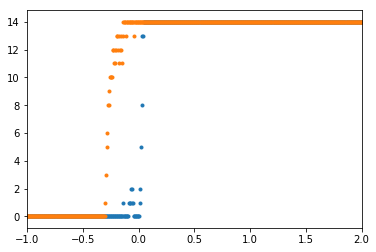

In [159]:
plt.scatter(S[0:5000], D[0:5000],marker=".")
plt.scatter(S[5001:10000], D[5001:10000],marker=".")

plt.xlim(-1, 2)
plt.axis('on')
plt.show()